# 作业2利用matplotlib等工具对TFRecord中的样本数据进行可视化

请输入需要验证的图片数量:2


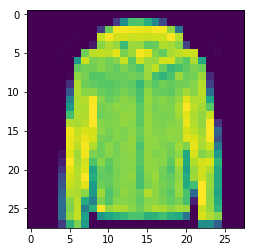

图片中的物品为: 外套


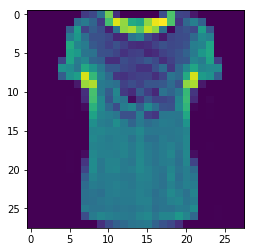

图片中的物品为: T恤
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer_2/input_producer_2_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer_2, input_producer_2/RandomShuffle)]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import tensorflow as tf

num=int(input('请输入需要验证的图片数量:'))
#创建一个字典存储数字所对应的标签
bq={0:'T恤',1:'裤子',2:'套衫',3:'裙子',4:'外套',5:'凉鞋',6:'汗衫',7:'运动鞋',8:'包',9:'踝靴'} 
#创建一个reader来读取TFRecord文件中的样例并创建输入队列
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(["/home/srhyme/ML project/DS/train.tfrecords"])  
#从文件中读取并解析一个样例  
_, example = reader.read(filename_queue)  
features = tf.parse_single_example(
    example,features={
        'image_raw': tf.FixedLenFeature([], tf.string),  
        'label': tf.FixedLenFeature([], tf.int64),  
    })
#将字符串解析成图像对应的像素数组,其他数据转换成需要的数据类型
images = tf.decode_raw(features['image_raw'], tf.uint8)
labels = tf.cast(features['label'], tf.int32) 
 
with tf.Session() as sess:  
#启动多线程处理输入数据
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
#可视化数据
    for i in range(num):
        image, label = sess.run([images, labels])
        image=image.reshape(28,28)       
        plt.imshow(image)
        pylab.show()
        print('图片中的物品为:',bq[label])